# Part I - Loan Data from Prosper Analysis
## by Marshal Ruzvidzo

### Preliminary Wrangling



The file explores and analyze loan data from prosper which contains 113937 rows and 81 variables

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell #enabling to  printing multple outputs on one cell
InteractiveShell.ast_node_interactivity 
%matplotlib inline

In [2]:

df= pd.read_csv('prosperLoanData.csv')


##### Overview of the dataset

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.shape


(113937, 81)

In [6]:
# summary statistics of the variables
df.describe()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# Finding Duplicate columns
df[df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#####  interesting features of the dataset

1. LoanKey
2. Term
3. LoanStatus
4. BorrowerAPR
5. ListingCategory (numeric)
6. CreditScoreRangeUpper
7. CreditScoreRangeLower
8. Occupation
9. LoanOriginalAmount
10. IncomeRange
11. IsBorrowerHomeowner
12. StatedMonthlyIncome
13. IncomeVerifiable
14. DelinquenciesLast7Years
15. DebtToIncomeRatio


In [ ]:
features=["LoanKey","Term",'LoanStatus','BorrowerAPR',
          'ListingCategory (numeric)','CreditScoreRangeUpper','CreditScoreRangeLower','Occupation',
          'LoanOriginalAmount','IncomeRange',
         'IsBorrowerHomeowner','StatedMonthlyIncome',
         'IncomeVerifiable',
         'DelinquenciesLast7Years','DebtToIncomeRatio']

# selecting data of only interesting features
dfnew=df[features]



df2_clean=dfnew.dropna() # dropping the null data
# debt to income ratio greater than 1 is an outlier
count = df2_clean.loc[df2_clean['DebtToIncomeRatio']> 1].shape[0]
count
# 783 rows were  fount to contain debt to income ration greater than 1 and were removed
index_to_drop = df2_clean['DebtToIncomeRatio'] > 1

# Drop the rows using the boolean index
df2_clean.drop(df2_clean[index_to_drop].index, inplace=True)
df2_clean.isna().sum()
df2_clean.shape


### What is the structure of your dataset?

> The data set  that will be analysed with important features contains 101822 rows with 15 explanatory variables

### What is/are the main feature(s) of interest in your dataset?

> The main feature in the dataset is the borrower's borrower's Annual Percentage Rate (APR)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 

1. LoanKey
2. Term
3. LoanStatus
4. BorrowerAPR
5. ListingCategory (numeric)
6. CreditScoreRangeUpper
7. CreditScoreRangeLower
8. Occupation
9. LoanOriginalAmount
10. IncomeRange
11. IsBorrowerHomeowner
12. StatedMonthlyIncome
13. IncomeVerifiable
14. DelinquenciesLast7Years
15. DebtToIncomeRatio

###### Functions

In [11]:
# Histogram function
def plot_histogram(df, column_name,bins):
    # Plot the histogram
    df[column_name].plot.hist(bins=bins)
    mode_values = df[column_name].mode()
    # Add a vertical line at the mode value
    for mode_value in mode_values:
        plt.axvline(mode_value, color='purple', linestyle='solid', label='Mode')

    
    
    plt.legend()
    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column_name)
    plt.show()

# Bar graph function for relative frequency

def plot_bar_graph_relfreq(df, column_name):
    # Plot the bar graph
    freq=df[column_name].value_counts()
    rel_freq = freq.div(freq.sum())
    rel_freq.plot.bar()

    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Relative Frequency')
    plt.title('Bar graph of ' + column_name)
    plt.show()


# Bar graph function for frequency

def plot_bar_graph(df, column_name):
    # Plot the bar graph
    freq=df[column_name].value_counts()
    
    freq.plot.bar()
    mode_values = df[column_name].mode()
    for mode_value in mode_values:
        plt.axvline(mode_value, color='purple', linestyle='solid', label='Mode')

    
    
    plt.legend()
    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Bar graph of ' + column_name)
    plt.show()


# A function to plot a scatter plot
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter plot'+ ' '+ x + ' '+'against'+' '+ y)
    plt.show()

# A function to blot a box plot
def box_plot(dataframe, x, y):
    df = dataframe[[x,y]]
    plt.figure(figsize=(20,13))
    df.boxplot(by=x, column=y)
    plt.xticks(rotation=90)
    #plt.title('Box plot'+ ' '+ x + ' '+'against'+' '+ y)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()




# A funtion to plot a violin plot
def plot_violin(df:pd.DataFrame,x:str,y:str,hue:str=None):
    """
    This function creates a violin plot in pandas.
    The function takes 3 arguments :
    - df : a pandas dataframe
    - x : a string representing the name of the column to use as x-axis
    - y : a string representing the name of the column to use as y-axis
    - hue : a string representing the name of the column to use as hue (optional)
    """
    ax = plt.figure(figsize=(10,5))
    sns.violinplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'Violin plot of {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# A function to plot a facet grid
def facet_bar_plot(dataframe, column,x,y):
    g = sns.FacetGrid(dataframe, col=column)
    g.map(sns.scatterplot, x, y)
    return g

## Univariate Exploration







##### Qestion 1: What were purposes of the  loans  taken from Prosper

##### Visualization: a bar chart is plotted to show the distributions of loans purposesin the dataset

In [18]:
# encoding the ListCategory numbers to meaningful categories


# Create the mapping
mapping = {0:'Not Available' ,1:'Debt Consolidation', 2:'Home Improvement' ,3:'Business' ,4:'Personal Loan' ,5:'Student Use' ,6:'Auto', 7:'Student Use' ,8:'Baby&Adoption' ,
          9:'Boat' ,10:'Cosmetic Procedure' ,11:'Engagement Ring' ,12:'Green Loans',13:'Household Expenses' ,14:'Large Purchases', 15:'Medical/Dental' ,16:'Motorcycle' ,17:'RV',
          18:'Taxes' ,19:'Vacation' ,20:'Wedding Loans'}
 
# Use the map function to replace the values in the column with the corresponding mapping values
df2_clean['Listed_Category_new'] = df2_clean['ListingCategory (numeric)'].map(mapping)

C:\Users\marsh\AppData\Local\Temp\ipykernel_30216\1257185681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['Listed_Category_new'] = df2_clean['ListingCategory (numeric)'].map(mapping)


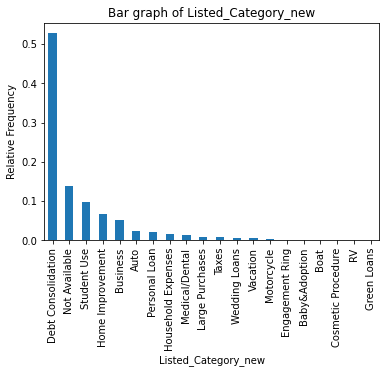

In [19]:
# Plotting
plot_bar_graph_relfreq(df2_clean,'Listed_Category_new')

##### Observation

From the bar above it can be concluded that  55% of the loans where used for debt consilidation. it can be noted that about 9% of the loans were for student use. This prompted further insights into  further investigation of debt consilidation loans and student loans since they consituted a bigger percentage than other categories.

###### Question 2: What is the distribution of loan amount of debt consolidation loans

###### Visualisation:  a  histogram is used to show the distribution of debt consolidation loans   

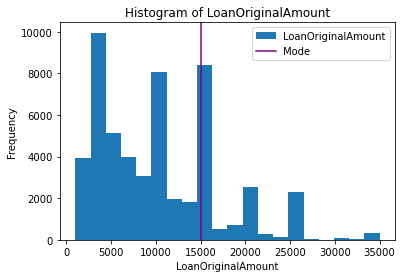

In [20]:
df_debt_consolidation=df2_clean[df2_clean['Listed_Category_new']=='Debt Consolidation']
plot_histogram(df_debt_consolidation, 'LoanOriginalAmount',20)

##### Observation

The histogram above is right skewed which means many borrowers were borrowing small amount for debt consolidation. Many borrowers were borrowing a typical amount of $15000 as shown by the mode 

###### Question 3: What is the distribution of loans borrowed for student use

###### Visualisation:  a  histogram is used to show the distribution of student use loans   

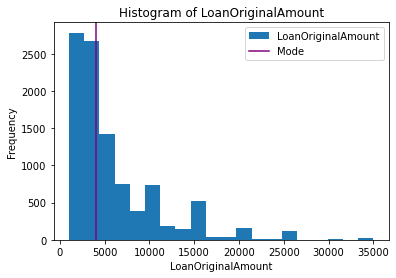

In [21]:
df_studentuse=df2_clean[df2_clean['Listed_Category_new']=="Student Use"]
plot_histogram(df_studentuse, 'LoanOriginalAmount',20)

##### Observation

The histogram above is right skewed with a mode of about 4K which means that many students did not borrow large amoounts of money greater than 4000K.  

###### Question 4 : What is the distribution of Home owners

###### Visualisation:  a  bar graph is used to show the distribution of Homeowners

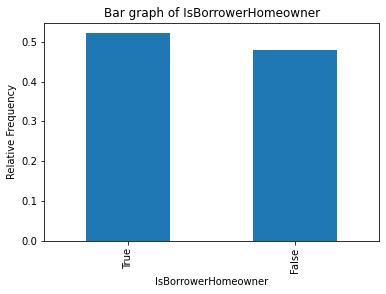

In [22]:
plot_bar_graph_relfreq(df2_clean, 'IsBorrowerHomeowner')

##### Observation

The bar chart above is shows that borrowers who were home owners were slightly above  50%. Hence  it means that a large numbers of borrowers from did not own houses and this prompts a further question on what was the distirbution of the money borrowed across the wholedataset to investigate what kind of customers were targeted by Prosper.

###### Question 5 : What is the distribution of LoanOriginal Amount

###### Visualisation:  a  histogram is used to show the distribution of the original amount borrowed

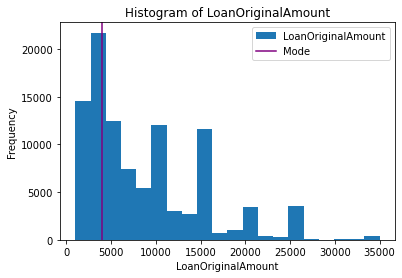

In [23]:
plot_histogram(df2_clean, 'LoanOriginalAmount',20)

##### Observation

The histogram above is right skewed which shows that many borrowers in the data set were borrowing smalle amounts of money. The median amount of money is about 4000 which shows that many customers of Prosper where borrowing few thousand of dollars. This also provides any insight about why many borrowers were not home owners. This coould be attributed to the fact that many borrowers were borrowing smaller amounts which does not need a house as a collateral security.

###### Question 6: What is the distribution of Borrower APR

###### Visualisation:  a  histogram is used to show the distribution of Borrower APR 

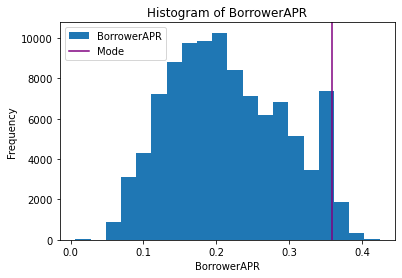

In [24]:
plot_histogram(df2_clean, 'BorrowerAPR',20)

##### Observation

The histogram above shows almost a normal distribution of the Borrower APR. It can be concluded that from this dataset the most occurence borrower APR is about 0.36 and very few borrowers were paying a borrower APR of more than 40%. Generally the mode of borrower APR is very high

###### Question 6: What is the distribution of StatedMonthlyIncome

###### Visualisation:  a  histogram is used to show the distribution of StatedMonthlyIncome

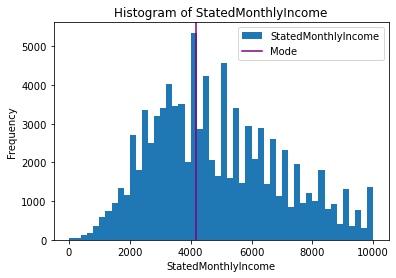

In [25]:
# Removing outlier
mask = df2_clean['StatedMonthlyIncome'] > 10000

# Remove the rows that match the mask
df3_clean = df2_clean[~mask]

plot_histogram(df3_clean, 'StatedMonthlyIncome',50)

##### Observation

The histogram is  almost like multi modal distribution with many peaks abeing around 4.6K. This shows that many people were borrowing money which is almost equivalent to their monthly income since the LoanOriginalAmount variable shows a distribution with a mode of around 4K.  Very few people earn above 15K per month. it its now understandable that this money was borrwed to pay other debts. 

###### Question 7: What is the distribution of IncomeRange

###### Visualisation:  a  histogram is used to show the distribution of IncomeRange

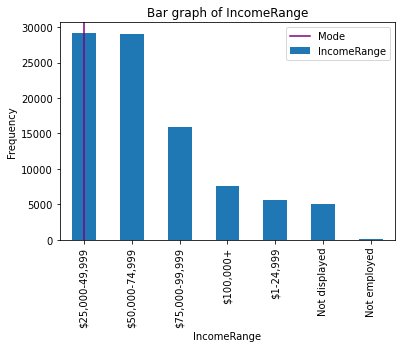

In [26]:
plot_bar_graph(df3_clean, 'IncomeRange')

##### Observation

The bar graph  is  right skewed with mode being in the range 25K-50K . This shows that many people were borrowing money from Prosper were not high income earners and this justify why borrowers with monthly income  of above 30K were dropped as these were outliers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the distribution of BorrowerAPR variable plotted above it was noted that the distribution was almost normal. No usual points were detected hence no transformations were needed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the Loan original amaount were right skewed with a mode of about 4K whilst the highest amount to be borrowed was 35K !
> The listed category variable was encoded to from numeric values to meaning categories which explicitly stated the purpose of the loan. After plotting the bar graph of the LoanOriginalAmount is was observed to be right skewed with mode being 4K and the largest amount to be borrowed being 35K
> Also the stated monthly income contained some outliers which made the graph right skewed. After observing the income range variable with maximm range being  50K. So this translates to the monthly income being an average of 5K. So all monthly income above 10K were regarded as outliers and were dropped. 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###### Question 1: What is the correlation across all numerical variables of interest

###### Visualisation:  a  heatmap which shows a correlation matrix is being plotted

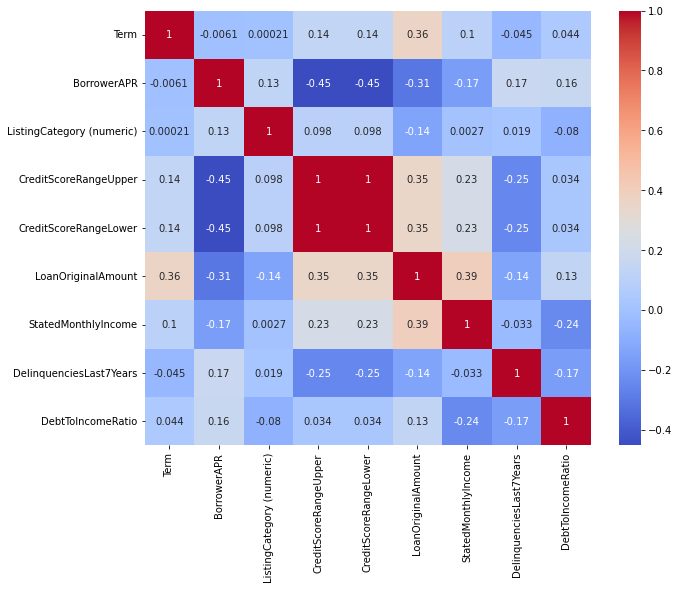

In [27]:
# Extract numerical columns
numerical_cols = df3_clean.select_dtypes(include=['int64','float64']).columns
data= df3_clean[numerical_cols]

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()


##### Observation

The heat map above it can be shown that there is a weak positve correlation coefficient between LoanOriginalAmount and Term. This is expected because the larger the amount the longer it takes to pay back. Also there is weak positve correlation between LoanOriginalAmount and StatedMOnthlyIncome. Lastly there medium negative correlation between CreditScoreUpppr and BorrowerAPR. This means if a person has a higher credit score it means his/her borrower APR is lower because of less risk to default. This prompted further questions such as how does the StatedMonthlyIncome vary with Loarn Original Amount and also further questions on the variability of BorrowerAPR

###### Question 2: What is the relationship between Borrower APR and StatedMonthlyIncome

###### Visualisation:  a  scatter plot tthat shows relationship between BorrowerAPR and StatedMonthlyIncome

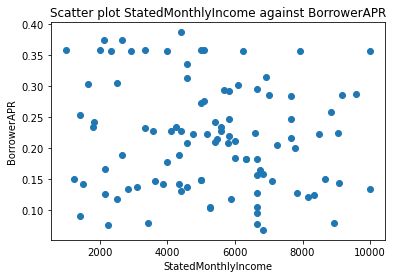

In [28]:
# sample 100 samples to make the plot much clearer
scatter_plot(df3_clean.sample(n=100),'StatedMonthlyIncome','BorrowerAPR')



##### Observation

From the scatter plot above it can be shown that as the StatedMOnthlyIncome increase the BorrowerAPR decreases.

###### Question 2: What is the relationship between Borrower APR and CreditScoreRangeUpper

###### Visualisation:  a  scatter plot tthat shows relationship between BorrowerAPR and CreditScoreRangeUpper

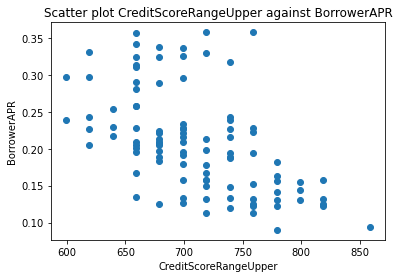

In [29]:
# Extract numerical columns
scatter_plot(df3_clean.sample(n=100),'CreditScoreRangeUpper','BorrowerAPR')



##### Observation

From the scatter plot above it can be shown that as the CreditScoreRangeUpper increase the BorrowerAPR decreases. Hence if someone has higher credit score he is likely to pay a lower borrower APR compared to those with lower credit scores.

###### Question 3: What is the distribution between Borrower APR and ListingCategory

###### Visualisation:  a  box plot that shows  the distribution between BorrowerAPR and CreditScoreRangeUpper

<Figure size 1440x936 with 0 Axes>

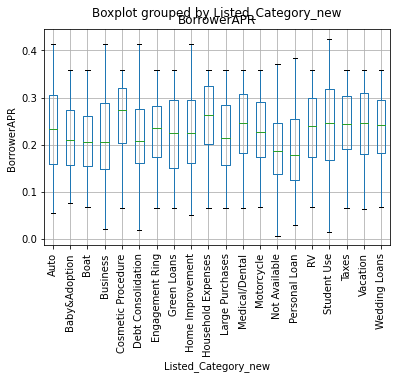

In [30]:
# Extract numerical columns
box_plot(df3_clean,'Listed_Category_new','BorrowerAPR')



##### Observation

From the the box plot above it can be shown that loans borrowed for student use had the highest borrower APR. The typical borrower APR for Household Expenses was the highest as shown by its median 

###### Question 3: What is the distribution between Borrower APR and Term 

###### Visualisation:  a  box plot that shows  the distribution between BorrowerAPR and Term

<Figure size 1440x936 with 0 Axes>

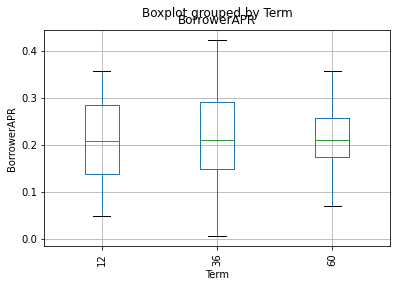

In [31]:
# Extract numerical columns
box_plot(df3_clean,'Term','BorrowerAPR')



##### Observation

From the the box plot above it can be shown that loans that has a term of 36 months had  the highest and lowest Borrower APR. Even its median BorrowerAPR is high compared to other terms. It is suprising because one would expect that the 60 months term loan would have the highest median of Borrower APR. This raises the question of the relationship between Term and Loan original amount. 

###### Question 4: What is the distribution between LoanOrignalAmount and Term 

###### Visualisation:  a  violin plot tshows  the distribution between LoanOrignalAmount and Term

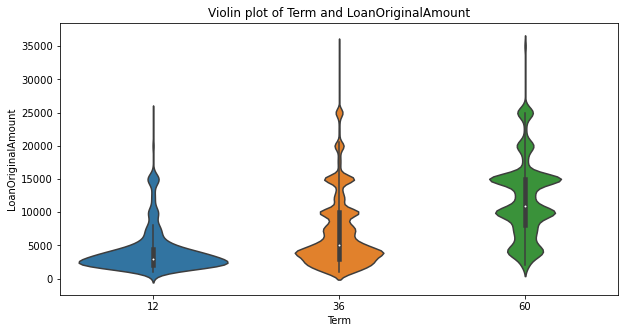

In [32]:
plot_violin(df3_clean,'Term','LoanOriginalAmount')

##### Observation

From the the violin plot above it can be shown that loans that has a terms of 12 and 36 months had  the highest LoanOriginalAmount.Hence it can be concluded that the higher the term the more amount of money you can borrow from prosper. Fo loans with 12 and 36 motths the largest densiteS were around 4K meaning that many people who borrowed for that term were borrowing around 4K. Lastly for people with 60 months term, their borrwoing amount was populated around 15K.  This raises the question to investigate the DebtToIncomeRatio and Term

###### Question 5: What is the distribution between DebtToIncomeRatio and Term 

###### Visualisation:  a  violin plot tshows  the distribution between DebtToIncomeRatio and Term

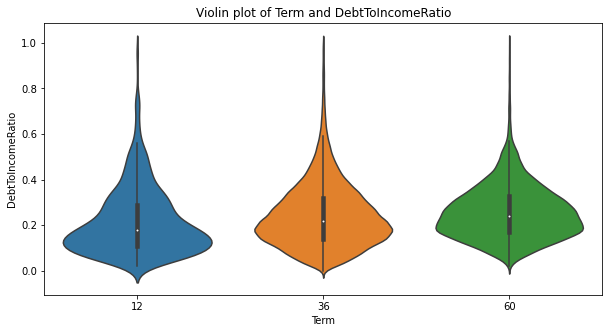

In [33]:
plot_violin(df3_clean,'Term','DebtToIncomeRatio')

##### Observation

From the the violin plot above it can be shown that loans that has a terms of 36 and 60 months had  slightly DepthToIncomeRatio than 12 months term loans. Hence it can be concluded loans with higher terms they can slightly tolerate a higher debt to income ratio.This makes sense becuase if the period to pay back the loan is short and the borrower has a higher debt to income ratio it means that there is a higher risk of defaulting the loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main feature of interest was BorrowerAPR. 
>* CreditScoreRangeUpper increases the BorrowerAPR decreases.
>* Loans  that were borrowed for student use had the highest borrower APR. The typical borrower APR for Household Expenses was the highest as shown by its median 
>* it is suprising that those category Not Available had the lowest borrower APR
>* Loans that has a term of 36 months had  the highest, lowest and median BorrowerAPR. Also it is can be concluded that if the borrower has a term of 12 months his/her BorrowerAPR can exceed 0.35

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Other Features Investigated included DepthToIncomeRatio and LoanOriginalAmount
> * Loans with longer terms  had higher  DebtToIncome ratio.This makes sense becuase if the period to pay back the loan is short and the borrower has a higher debt to income ratio it means that there is a higher risk of defaulting the loan. So for one to qualify for a short term loan  his/her debt to income ratio should be lower
> *Loans that has  terms of 12 and 36 months had  the highest LoanOriginalAmount.Hence it can be concluded that the higher the term the more money you can borrow from Prosper.  People with 60 months term, their borrowing amount was populated around 15K.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###### Question 1: What is the distribution of BorrowerAPR, LoanOriginalAmount and IncomeRange

###### Visualisation:  a  facet grid that shows  the relationship between BorrowerAPR and LoanOriginalAmount  across different income ranges

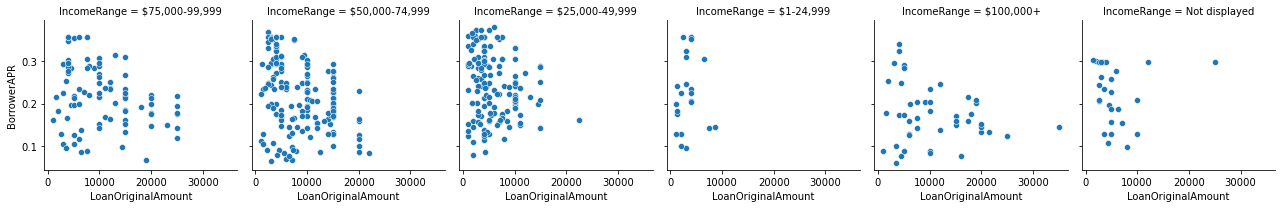

In [34]:

facet_bar_plot(df3_clean.sample(n=500), 'IncomeRange','LoanOriginalAmount','BorrowerAPR')


##### Observation

From the the facet plot above it can be concluded that as the LoanOrginalAmount increases the BorrowerAPR decreasese across all income ranges. This is expected because as the borrower APR is paid annually so over a long period the borrower APR annualpayments accumulates.

###### Question 2: What is the distribution of Borrower APR , CreditScoreRangeUpper and IncomeRange

###### Visualisation:  a  facet grid that shows  the relationship  between Borrower APR and CreditScoreRangeUpper across different income ranges

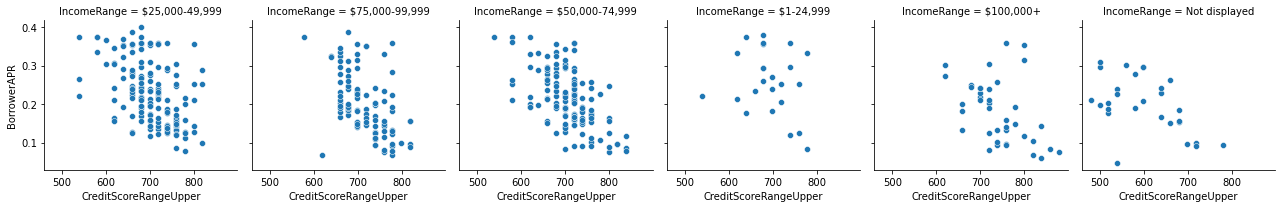

In [35]:

facet_bar_plot(df3_clean.sample(n=500), 'IncomeRange','CreditScoreRangeUpper','BorrowerAPR')


##### Observation

From the the facet plot above it can be concluded that the as the CreditScoreRangeUpper increases the BorrowerAPR decreasese across all income ranges.

###### Question 3: What is the distribution of Borrower APR , DebtToIncomeRaitio and Term

###### Visualisation:  a  scatter plot that shows  the relationship  between Borrower APR and DebtToIncomeRaitio across different Term

In [36]:
data=df3_clean.sample(n=200)
groups=data.groupby('Term')
Term12=groups.get_group(12)
Term36=groups.get_group(36)
Term60=groups.get_group(60)


Text(0.5, 1.0, 'BorrowerAPR against DebtToIncomeRatio across different Loan terms ')

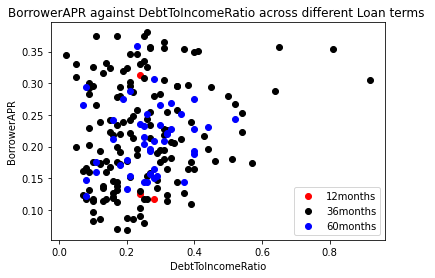

In [37]:
plt.scatter(x= Term12['DebtToIncomeRatio'], y= Term12['BorrowerAPR'], c= 'r') #12 months 
plt.scatter(x= Term36['DebtToIncomeRatio'], y= Term36['BorrowerAPR'], c= 'k') #36 months
plt.scatter(x= Term60['DebtToIncomeRatio'], y= Term60['BorrowerAPR'], c= 'b') #60 months
plt.legend(['12months','36months','60months'])
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR against DebtToIncomeRatio across different Loan terms ')

##### Observation

* From the the scatter plot above it can be concluded that debt to income ratio for many loans was around 0.2-0.4. Also the range of borrower APR was between 0.05 to 0.4 for all different terms of the loan. 

###### Question : What is  relationship between  Borrower APR , DebtToIncomeRatio and Term

###### Visualisation:  a  scatter plot that shows  the relationship  between Borrower APR , DebtToIncomeRaitio and Term

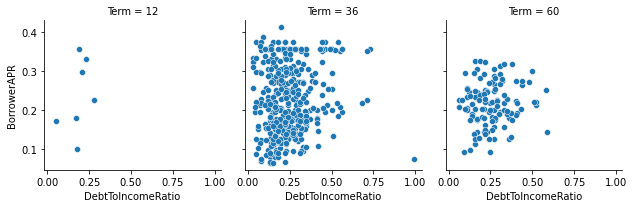

In [38]:
facet_bar_plot(df3_clean.sample(n=500), 'Term','DebtToIncomeRatio','BorrowerAPR')

##### Observation

* From the the scatter plot above it can be concluded that debt to income ratio for loans with a term of 12 months was lowest among other terms. Also the range of borrower APR  did not exceed 0.3 and was clusterd around 0.15.

###### Question : What is  relationship between  Borrower APR , DebtToIncomeRaitio and Listed_Category_new

###### Visualisation:  a  scatter plot that shows  the relationship  between Borrower APR , DebtToIncomeRaitio and Listed_Category_new

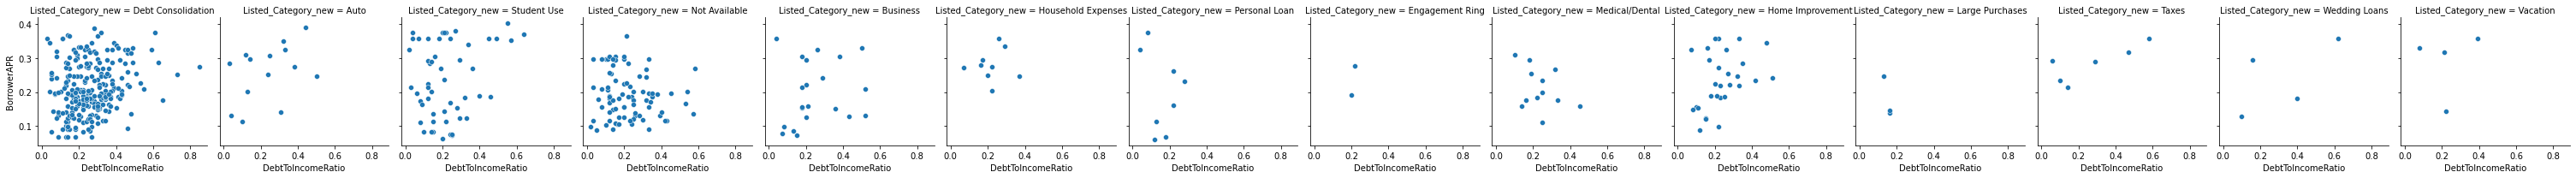

In [39]:

facet_bar_plot(df3_clean.sample(n=500), 'Listed_Category_new','DebtToIncomeRatio','BorrowerAPR')

##### Observation

* From the the scatter plot above it can be concluded that debt to income ratio for many loans did not exceed 0.4. Also the range of borrower APR did not exceed 0.4 for all different listed categories. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> *  LoanOrginalAmount increases as the BorrowerAPR decreasese across all income ranges. This is expected because as the borrower APR is paid annually so after the loan the annual payments accumulates.

> * the CreditScoreRangeUpper increases the BorrowerAPR decreasese across all income ranges.
### Were there any interesting or surprising interactions between features?

> * The most suprising relationship was between the Listed category, debt to income ratio and borrower APR. From the plot there was a listed category where people would borrow from Prosper for baby adoption. It is interesting because it shows how people are willing to go an extra mile to adopt babies

## Conclusions
> Main steps taken during data exploration were:
>*  visualize the distribution of variabel of interest such as Borrower APR, LoanOrginalAmount and Listed categories
>* After performing univariate exploration a bivariate exploaration was perfomed to investigate the relationship between variables.
>* Lastly multivariate exploration was conducted to investigate if other variables strengthened each other
Main findings from the exploration
>*  55% of the Prosper loans where used for debt consilidation.followed by about 9% of the loans for student use. 
>* if a borrower has a higher monthly income his/her borrower APR was lower compared to borrowers with lower monthly income
>* The original amount of loans from prosper were clustered around 4.5K
>*Loans with higher payback term tolerated a slightly higher debt to income ratio as compared to debt to income ratio for borrowers with short payback term.
>* Borrowers with a higher CreditScoreRangeUpper had a lower  BorrowerAPR across all income ranges.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

